In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

# Seasonal-Trend Decomposition using LOESS (STL)

## Read the Data

In [24]:
ice_cream_interest = pd.read_csv("data/ice_cream_interest.csv")
ice_cream_interest["month"] = pd.to_datetime(
    ice_cream_interest["month"], format="%Y-%m"
)
ice_cream_interest.set_index("month", inplace=True)
# ice_cream_interest = ice_cream_interest.asfreq(pd.infer_freq(ice_cream_interest.index))

In [25]:
ice_cream_interest

,interest
month,
2004-01-01,13
2004-02-01,15
2004-03-01,17
2004-04-01,19
2004-05-01,22
...,...
2020-04-01,55
2020-05-01,71
2020-06-01,81


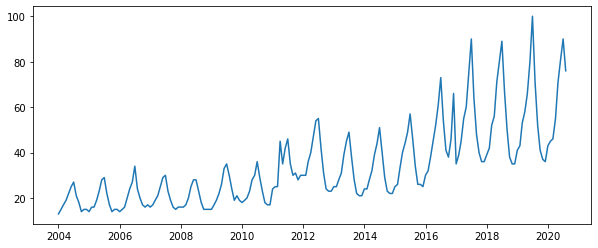

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(ice_cream_interest)

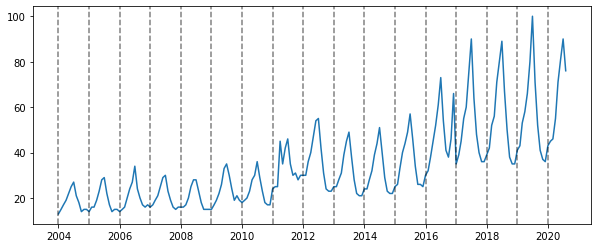

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(ice_cream_interest)
for year in range(2004, 2021):
    plt.axvline(datetime(year, 1, 1), color="k", linestyle="--", alpha=0.5)

## Visual Inspection: Mid-2011 and Late-2016

## Perform STL Decomp

In [28]:
stl = STL(ice_cream_interest)
result = stl.fit()

In [29]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

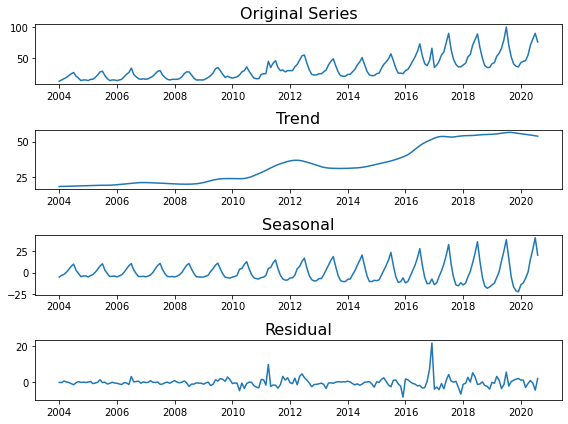

In [30]:
plt.figure(figsize=(8, 6))

plt.subplot(4, 1, 1)
plt.plot(ice_cream_interest)
plt.title("Original Series", fontsize=16)

plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title("Trend", fontsize=16)

plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title("Seasonal", fontsize=16)

plt.subplot(4, 1, 4)
plt.plot(resid)
plt.title("Residual", fontsize=16)

plt.tight_layout()

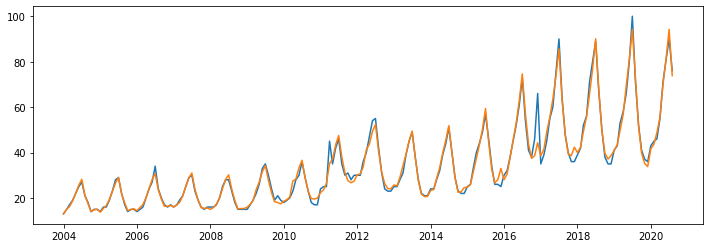

In [31]:
estimated = trend + seasonal
plt.figure(figsize=(12, 4))
plt.plot(ice_cream_interest)
plt.plot(estimated)

## Anomaly Detection

In [32]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3 * resid_dev
upper = resid_mu + 3 * resid_dev

(12296.0, 18597.0)

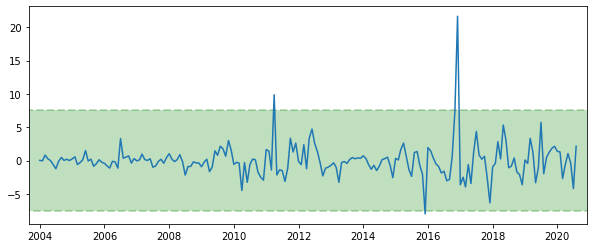

In [33]:
plt.figure(figsize=(10, 4))
plt.plot(resid)

plt.fill_between(
    [datetime(2003, 1, 1), datetime(2021, 8, 1)],
    lower,
    upper,
    color="g",
    alpha=0.25,
    linestyle="--",
    linewidth=2,
)
plt.xlim(datetime(2003, 9, 1), datetime(2020, 12, 1))

In [34]:
anomalies = ice_cream_interest[(resid < lower) | (resid > upper)]

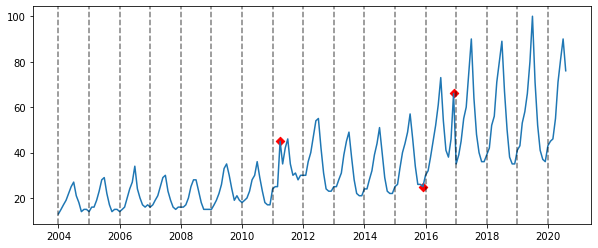

In [35]:
plt.figure(figsize=(10, 4))
plt.plot(ice_cream_interest)
for year in range(2004, 2021):
    plt.axvline(datetime(year, 1, 1), color="k", linestyle="--", alpha=0.5)

plt.scatter(anomalies.index, anomalies.interest, color="r", marker="D")

In [36]:
anomalies

,interest
month,
2011-04-01,45
2015-12-01,25
2016-12-01,66
